# Symulacje

In [146]:
import random
random.seed(123)

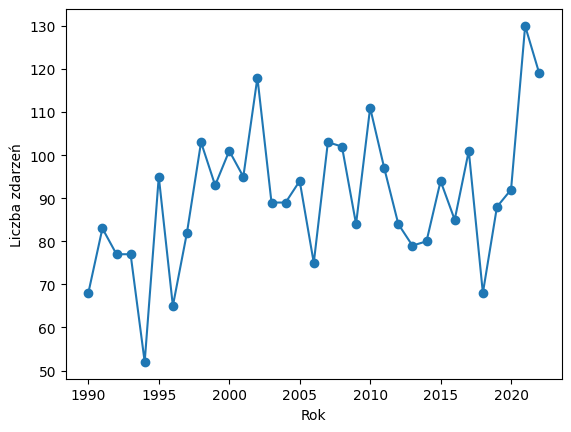

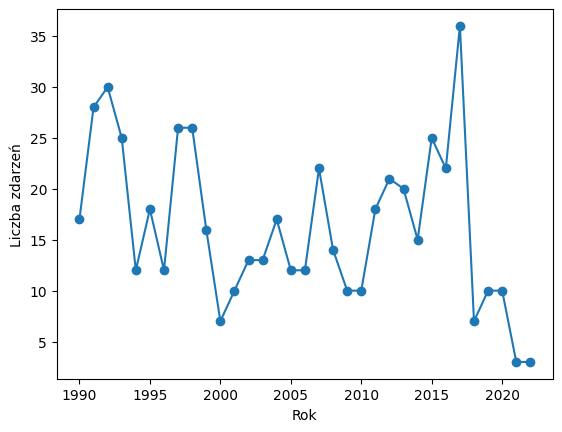

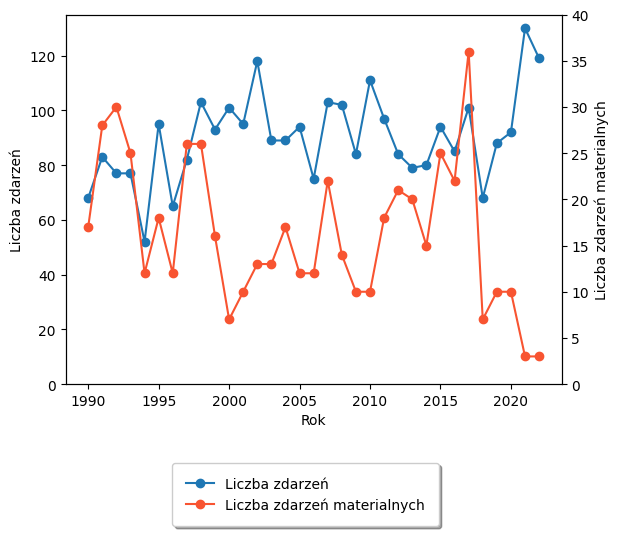

C:\Users\ndzadz001\AppData\Local\Temp\ipykernel_15124\2429601217.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


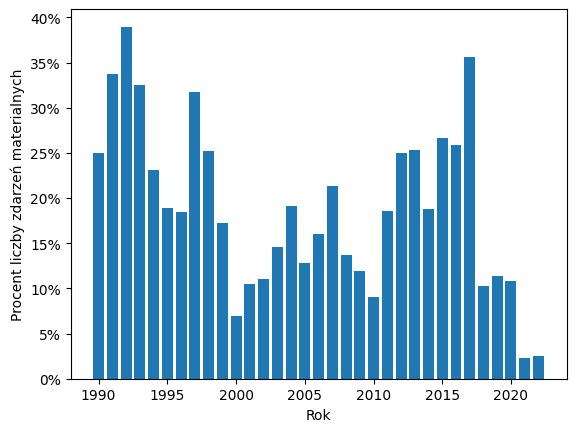

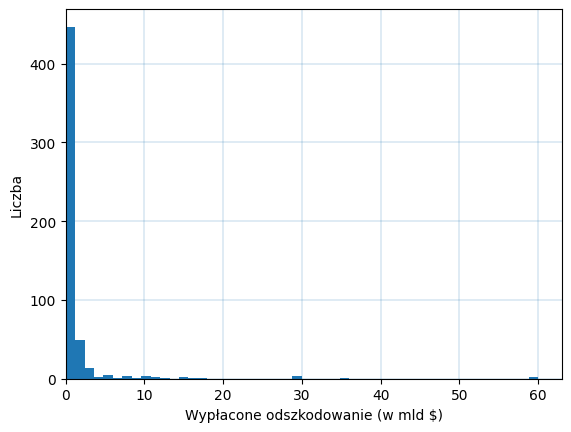

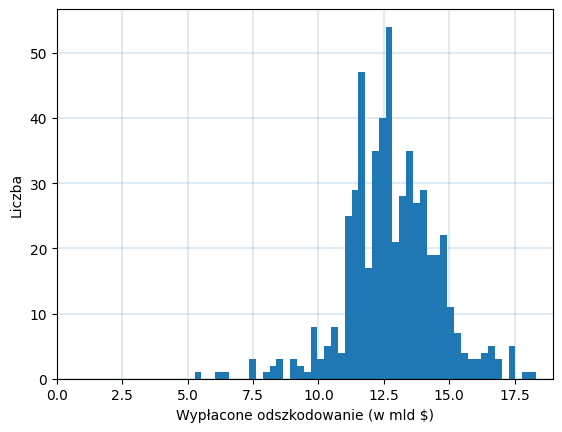

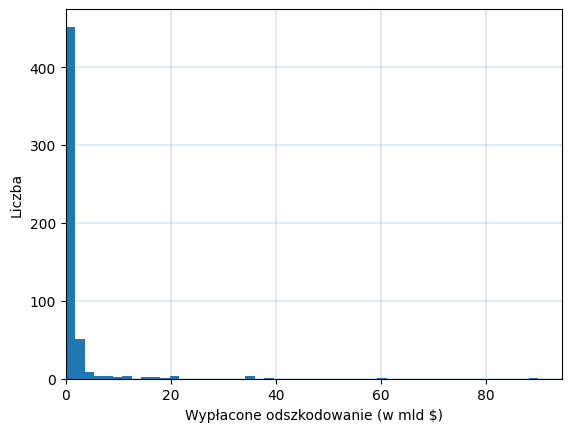

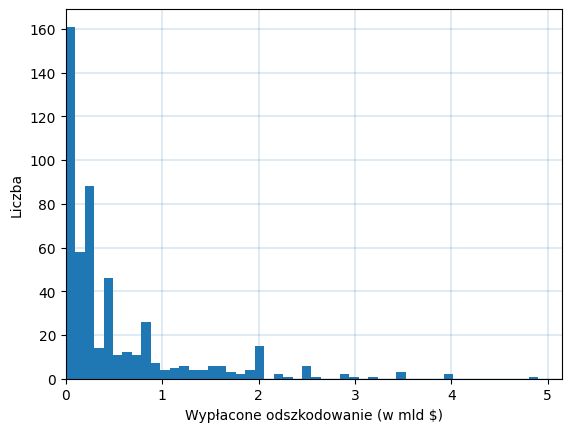

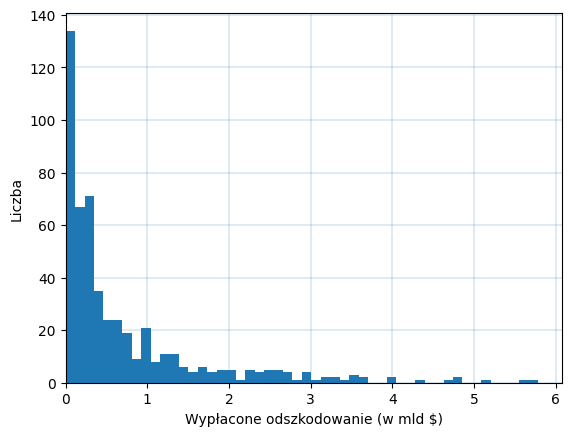

C:\Users\ndzadz001\AppData\Local\Temp\ipykernel_15124\2368923416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wo['Number_of_days_in_year'] = np.where(data_wo['Year']%4==0, 366, 365)


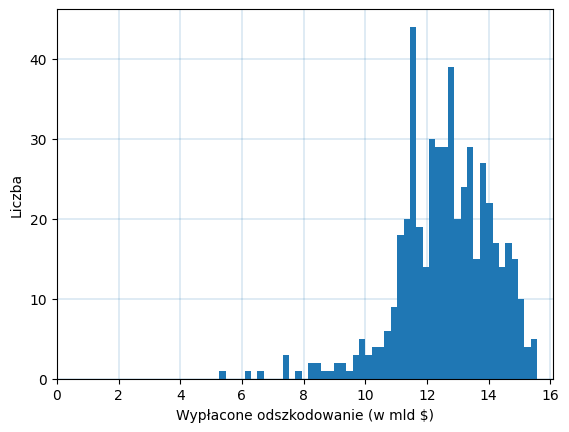

In [395]:
#%run "C:\Users\ndzadz001\Documents\Mgr\Repo\mgr\DataPreparation.ipynb"
#%run "C:\Users\ndzadz001\Documents\Mgr\Repo\mgr\Modelowanie_liczby_roszczen.ipynb"

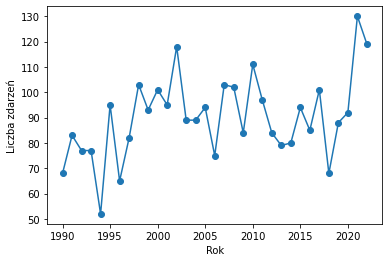

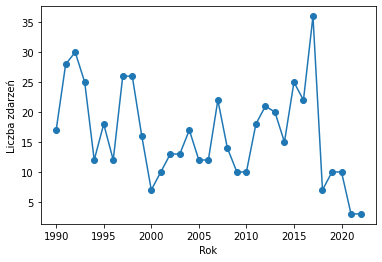

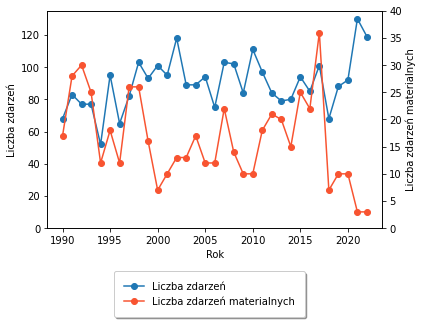

C:\Users\ndzad\AppData\Local\Temp/ipykernel_7824/1525856804.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


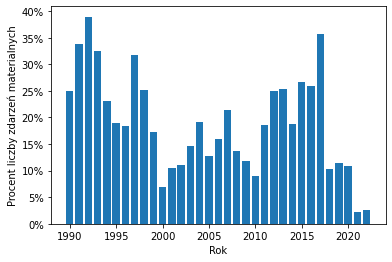

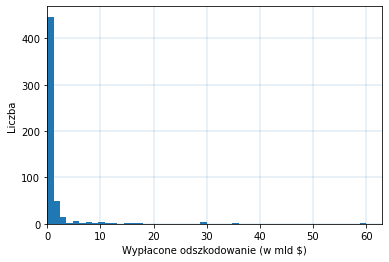

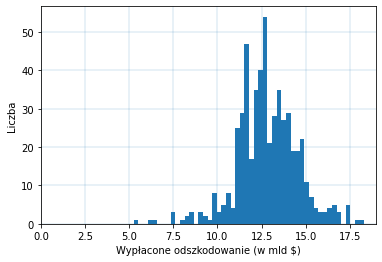

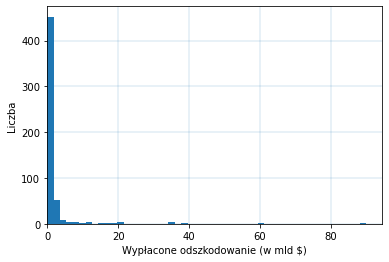

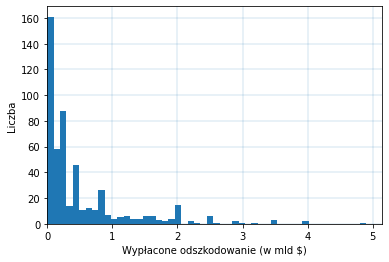

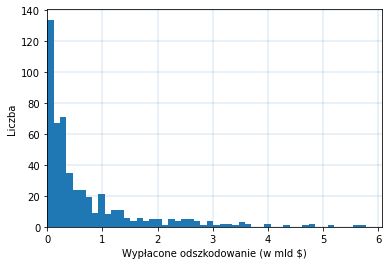

C:\Users\ndzad\AppData\Local\Temp/ipykernel_7824/2368923416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wo['Number_of_days_in_year'] = np.where(data_wo['Year']%4==0, 366, 365)


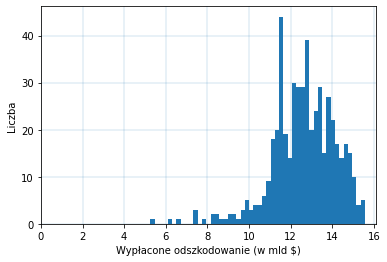

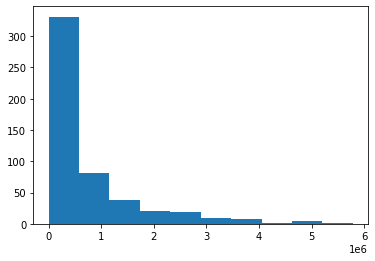

1.395e-06


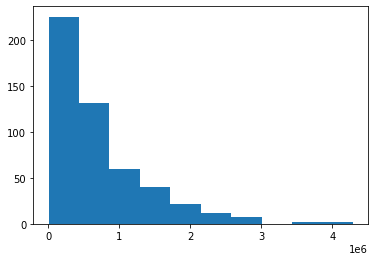

       rozkład test  Wartość statystyki       p value
0  Wykładniczy   KS                0.17  2.204314e-13
1  Wykładniczy   CM                3.84  1.057934e-09
12.62 2.34
12.621668063027759 2.340781724143795


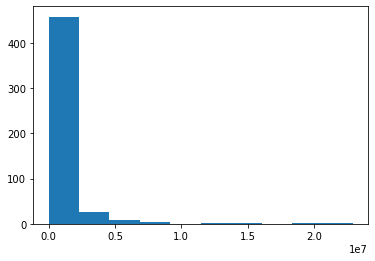

       rozkład test  Wartość statystyki   p value
0  Lognormalny   KS                0.06  0.067392
1  Lognormalny   CM                0.31  0.124573
0.7 9.791403734607547e-07


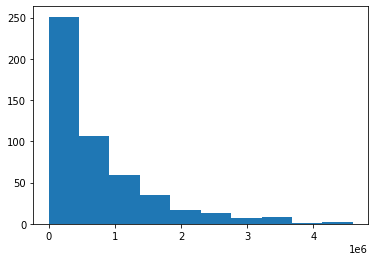

  rozkład test  Wartość statystyki   p value
0   Gamma   KS                0.11  0.000022
1   Gamma   CM                0.92  0.003782
0.7815037630821766 616457.6285386455


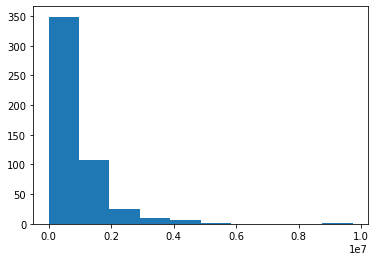

    rozkład test  Wartość statystyki   p value
0  Weibulla   KS                0.08  0.001437
1  Weibulla   CM                0.51  0.037898
2.0648177120321627 0.03837002023697435
  rozkład test  Wartość statystyki        p value
0   Burra   KS                0.50  1.711060e-120
1   Burra   CM               39.67   9.296288e-09


c:\Users\ndzad\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [147]:
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\DataPreparation.ipynb"
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\Modelowanie_liczby_roszczen.ipynb"
%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\Modelowanie_wartosci_odszkodowan.ipynb"
#%run "C:\Users\ndzad\Dropbox\MINI\Magisterka\repo\mgr\Modelowanie_wartosci_ryzyka.ipynb"

## Symulacja liczby roszczeń

In [3]:
number_of_simulations = 1000

### Empiryczna liczba roszczeń ze zbioru danych

In [4]:
T = pd.DataFrame({'t':[1990 + t/365 for t in range((datetime.datetime(1990,12,31)-datetime.datetime(1990,1,1)).days+1)]})
for r in range(1991,2023):
    if r%4==0:
        T = pd.concat([T,pd.DataFrame({'t':[r + t/366 for t in range((datetime.datetime(r,12,31)-datetime.datetime(r,1,1)).days+1)]})])
    else:
        T = pd.concat([T,pd.DataFrame({'t':[r + t/365 for t in range((datetime.datetime(r,12,31)-datetime.datetime(r,1,1)).days+1)]})])
T.reset_index(drop=True,inplace=True)

In [5]:
N = pd.merge(T, data_wo[['t','Ind']], on='t', how='left').fillna(0).groupby('t').sum().cumsum().assign(Year=np.floor(pd.merge(T, data_wo[['t','Ind']], on='t', how='left')['t']))
N = N.assign(Year=np.floor(N.index))
n = N.groupby('Year').max('Ind').diff().fillna(float(N.groupby('Year').max('Ind').head(1)['Ind'])).rename(columns = {'Ind':'n'})

T_train = T[T['t']<2013]
t_train = T_train['t'] - 1990
n_train = n[n.index<=2012]
N_train = N[N['Year']<=2012]

T_test = T[T['t']>=2013]
t_test = T_test['t'] - 2013
n_test = n[n.index>2012]
N_test = N[N['Year']>2012]

### Sinusoidalna funkcja intensywności

Dopasowanie

In [6]:
sin_params = scipy.optimize.curve_fit(cum_sin_int_fun, xdata = t_train, ydata = N_train["Ind"])[0]

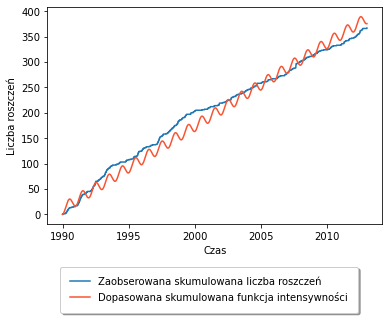

In [7]:
plt.plot(N_train['Ind'], linestyle= '-')
plt.plot(1990+t_train,cum_sin_int_fun(t_train,sin_params[0], sin_params[1], sin_params[2]), linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Zaobserowana skumulowana liczba roszczeń','Dopasowana skumulowana funkcja intensywności'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_N_cum_int_func.pdf",bbox_inches='tight')

plt.show()

Predykcja

In [148]:
N_sin = nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique()))

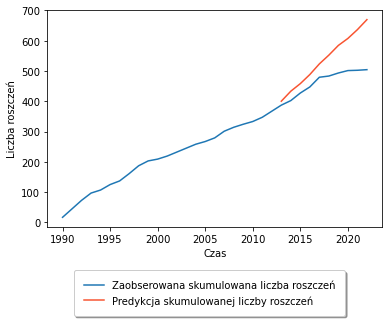

In [150]:
plt.plot(N.groupby('Year').max('Ind'), linestyle= '-')
plt.plot(range(2013,2023,1), N_sin[2] + float(N_train.tail(1)['Ind']), linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Zaobserowana skumulowana liczba roszczeń','Predykcja skumulowanej liczby roszczeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_number.pdf",bbox_inches='tight')

plt.show()

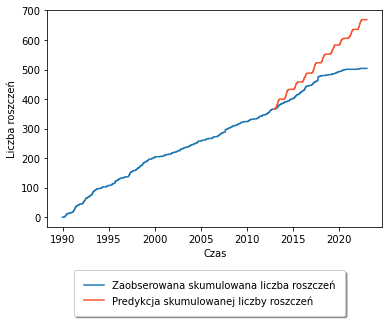

In [151]:
plt.plot(N["Ind"], linestyle= '-')
plt.plot(nhpp_pred(t_test, N_sin[1], T_test['t']) + float(N_train.tail(1)['Ind']), linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Zaobserowana skumulowana liczba roszczeń','Predykcja skumulowanej liczby roszczeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_number_cum.pdf",bbox_inches='tight')

plt.show()

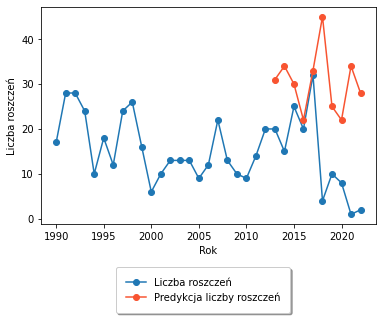

In [16]:
plt.plot(n, linestyle= '-', marker='o')
plt.plot(N_test["Year"].unique(),N_sin[2].diff().fillna(N_sin[2][1]), linestyle= '-',marker='o' ,color="#f85431")

plt.xlabel("Rok")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Liczba roszczeń','Predykcja liczby roszczeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\sin_number.pdf",bbox_inches='tight')

plt.show()

### Funkcja intensywności typu Power Law

Dopasowanie

In [17]:
power_law_params = scipy.optimize.curve_fit(cum_power_law_int_fun, xdata = t_train, ydata = N_train["Ind"])[0]

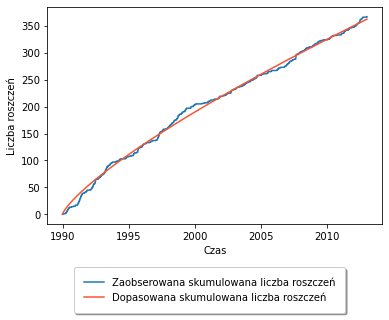

In [18]:
plt.plot(N_train['Ind'], linestyle= '-')
plt.plot(1990+t_train,cum_power_law_int_fun(t_train, power_law_params[0], power_law_params[1]), linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Zaobserowana skumulowana liczba roszczeń','Dopasowana skumulowana liczba roszczeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_N_cum_int_func.pdf",bbox_inches='tight')

plt.show()

Predykcja

In [19]:
N_power_law = nhpp(power_law_int_fun, power_law_params, len(np.floor(T_test['t']).unique())+1)

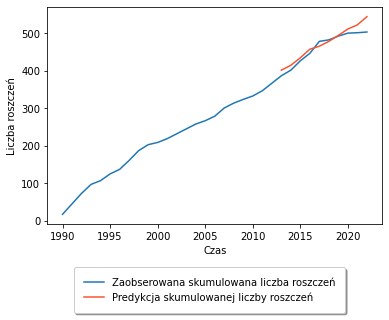

In [20]:
plt.plot(N.groupby('Year').max('Ind'), linestyle= '-')
plt.plot(range(2013,2023,1), N_power_law[2] + float(N_train.tail(1)['Ind']), linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Zaobserowana skumulowana liczba roszczeń','Predykcja skumulowanej liczby roszczeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_number.pdf",bbox_inches='tight')

plt.show()

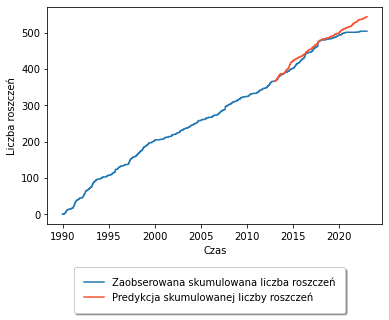

In [21]:
plt.plot(N["Ind"], linestyle= '-')
plt.plot(nhpp_pred(t_test, N_power_law[1], T_test['t']) + float(N_train.tail(1)['Ind']), linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Zaobserowana skumulowana liczba roszczeń','Predykcja skumulowanej liczby roszczeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_number_cum.pdf",bbox_inches='tight')

plt.show()

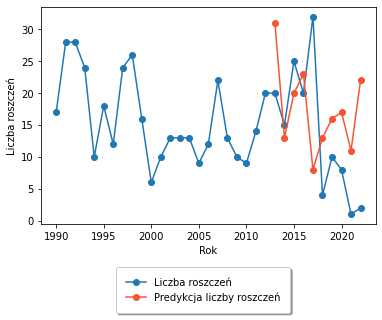

In [22]:
plt.plot(n, linestyle= '-', marker='o')
plt.plot(N_test["Year"].unique(),N_power_law[2].diff().fillna(N_sin[2][1]), linestyle= '-',marker='o' ,color="#f85431")

plt.xlabel("Rok")
plt.ylabel("Liczba roszczeń")
plt.figlegend(['Liczba roszczeń','Predykcja liczby roszczeń'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\power_law_number.pdf",bbox_inches='tight')

plt.show()

### Wyniki

In [23]:
MSE_sin_array = []
MAE_sin_array = []

for i in range(number_of_simulations):
    MSE_sin_array.append(MSE(N_test['Ind'], (nhpp_pred(t_test, nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique())+1)[1], T_test['t'])+ float(N_train.tail(1)['Ind']))))
    MAE_sin_array.append(MAE(N_test['Ind'], (nhpp_pred(t_test, nhpp(sin_int_fun,sin_params,len(np.floor(T_test['t']).unique())+1)[1], T_test['t'])+ float(N_train.tail(1)['Ind']))))

MSE_sin = np.sum(MSE_sin_array)/number_of_simulations
MAE_sin = np.sum(MAE_sin_array)/number_of_simulations

In [24]:
MSE_power_law_array = []
MAE_power_law_array = []

for i in range(number_of_simulations):
    MSE_power_law_array.append(MSE(N_test['Ind'], (nhpp_pred(t_test, nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique())+1)[1], T_test['t'])+ float(N_train.tail(1)['Ind']))))
    MAE_power_law_array.append(MAE(N_test['Ind'], (nhpp_pred(t_test, nhpp(power_law_int_fun,power_law_params,len(np.floor(T_test['t']).unique())+1)[1], T_test['t'])+ float(N_train.tail(1)['Ind']))))

MSE_power_law = np.sum(MSE_power_law_array)/number_of_simulations
MAE_power_law = np.sum(MAE_power_law_array)/number_of_simulations

In [37]:
print(pd.DataFrame
({
    'funkcja':['Sinusoidalna funkcja straty','Power Law'],
    'parametry':[sin_params.round(3),power_law_params.round(3)],
    'MSE':[round(np.mean(MSE_sin),2),round(np.mean(MSE_power_law),2)],
    'MAE':[round(np.mean(MAE_sin),2),round(np.mean(MAE_power_law),2)]                                            
}))

                       funkcja                parametry      MSE    MAE
0  Sinusoidalna funkcja straty  [16.329, 10.769, 1.004]  7195.11  69.61
1                    Power Law          [31.908, 0.775]   377.47  13.93


### Symulacja wartości odszkodowań

Dane zaobserwowane

In [185]:
loss_full = pd.merge(T, data_wo[['t','Insured Damages, Adjusted (\'000 US$)']], on='t', how='left').fillna(0).set_index('t').rename(columns={'Insured Damages, Adjusted (\'000 US$)':'damages'})
cum_loss_full = loss_full.cumsum()

In [186]:
loss_train = pd.merge(T, train[['t','Insured Damages, Adjusted (\'000 US$)']], on='t', how='left').fillna(0).set_index('t').rename(columns={'Insured Damages, Adjusted (\'000 US$)':'damages'})
cum_loss_train = loss_train.cumsum()

In [187]:
loss_test = pd.merge(T, test[['t','Insured Damages, Adjusted (\'000 US$)']], on='t', how='left').fillna(0).set_index('t').rename(columns={'Insured Damages, Adjusted (\'000 US$)':'damages'})
cum_loss_test = loss_test.cumsum()

In [89]:
def loss_pred(t, n, damages, t_index):
    """
    Funkcja generuje proces dla zaobserwowanych zdarzeń.

    Argumenty:
        t: array
            Przestrzeń czasów
        n: array
            Zaobserowane czasy zdarzenia
        damages: array
            Straty
        t_index: array
            Pożądane indeksy
    Zwraca:
        pandas.Series
            Tablica czasów.
    """
    df = pd.DataFrame({'t':n, 'damages':damages}).set_index('t')
    counts = [sum([1 for x in n if x <= y]) for y in t]
    values = [sum([df['damages'][x] for x in n if x <= y]) for y in t]
    return(pd.DataFrame({'n' : counts, 'damages': values}, index = t_index))

Rozkład wykładniczy

In [206]:
#Sinusoidalna funkcja intensywności

damages_sin_exp = np.array([stats.expon.rvs(scale=1/lambda_hat,loc=0,size=1) for i in range(len(N_sin[1]))]).flatten()
cum_loss_sin_exp = loss_pred(t_test,N_sin[1],damages_sin_exp, T_test['t'])

In [207]:
#Funkcja intensywności typu Power Law

damages_power_law_exp = np.array([stats.expon.rvs(scale=1/lambda_hat,loc=0,size=1) for i in range(len(N_power_law[1]))]).flatten()
cum_loss_power_law_exp = loss_pred(t_test,N_power_law[1],damages_power_law_exp, T_test['t'])

Rozkład lognormalny

In [208]:
#Sinusoidalna funkcja intensywności

damages_sin_ln = np.array([stats.lognorm.rvs(s=np.sqrt(sigma_sq_hat),scale=np.exp(mu_hat),size=1) for i in range(len(N_sin[1]))]).flatten()
cum_loss_sin_ln = loss_pred(t_test,N_sin[1],damages_sin_ln, T_test['t'])

In [209]:
#Funkcja intensywności typu Power Law

damages_power_law_ln = np.array([stats.lognorm.rvs(s=np.sqrt(sigma_sq_hat),scale=np.exp(mu_hat),size=1) for i in range(len(N_power_law[1]))]).flatten()
cum_loss_power_law_ln = loss_pred(t_test,N_power_law[1],damages_power_law_ln, T_test['t'])

Rozkład gamma

In [210]:
#Sinusoidalna funkcja intensywności

damages_sin_gamma = np.array([stats.gamma.rvs(a=gamma_alfa,scale=1/gamma_beta,size=1) for i in range(len(N_sin[1]))]).flatten()
cum_loss_sin_gamma = loss_pred(t_test,N_sin[1],damages_sin_gamma, T_test['t'])

In [211]:
#Funkcja intensywności typu Power Law

damages_power_law_exp = np.array([stats.gamma.rvs(a=gamma_alfa,scale=1/gamma_beta,size=1) for i in range(len(N_power_law[1]))]).flatten()
cum_loss_power_law_gamma = loss_pred(t_test,N_power_law[1],damages_power_law_exp, T_test['t'])

Rozkład Weibulla

In [212]:
#Sinusoidalna funkcja intensywności

damages_sin_weibull = np.array([stats.weibull_min.rvs(c=weibull_k,scale=weibull_lambda,size=1) for i in range(len(N_sin[1]))]).flatten()
cum_loss_sin_weibull = loss_pred(t_test,N_sin[1],damages_sin_weibull, T_test['t'])

In [213]:
#Funkcja intensywności typu Power Law

damages_power_law_weibull = np.array([stats.weibull_min.rvs(c=weibull_k,scale=weibull_lambda,size=1) for i in range(len(N_power_law[1]))]).flatten()
cum_loss_power_law_weibull = loss_pred(t_test,N_power_law[1],damages_power_law_weibull, T_test['t'])

Rozkad Burra

In [214]:
#Sinusoidalna funkcja intensywności

damages_sin_burr = np.array([stats.burr12.rvs(c=burr_c,d=burr_k,size=1) for i in range(len(N_sin[1]))]).flatten()
cum_loss_sin_burr = loss_pred(t_test,N_sin[1],damages_sin_burr, T_test['t'])

In [215]:
#Funkcja intensywności typu Power Law

damages_power_law_burr = np.array([stats.burr12.rvs(c=burr_c,d=burr_k,size=1) for i in range(len(N_power_law[1]))]).flatten()
cum_loss_power_law_burr = loss_pred(t_test,N_power_law[1],damages_power_law_burr, T_test['t'])

### Symulacja strat

Rozkład wykładniczy

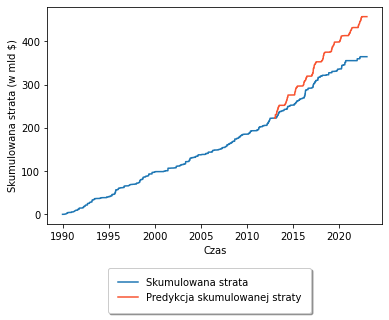

In [216]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_sin_exp["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_sin.pdf",bbox_inches='tight')
plt.show()

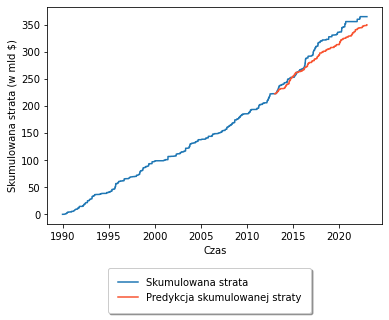

In [217]:
#Funkcja intensywności Power Law

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_power_law_exp["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_power_law.pdf",bbox_inches='tight')
plt.show()

In [218]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law'],
    'MSE':["{:e}".format(MSE(cum_loss_test["damages"],cum_loss_sin_exp["damages"])),"{:e}".format(MSE(cum_loss_test["damages"],cum_loss_power_law_exp["damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["damages"],cum_loss_sin_exp["damages"])),"{:e}".format(MAE(cum_loss_test["damages"],cum_loss_power_law_exp["damages"]))]                                            
}))

ValueError: operands could not be broadcast together with shapes (12066,) (3652,) 

Rozkład lognormalny

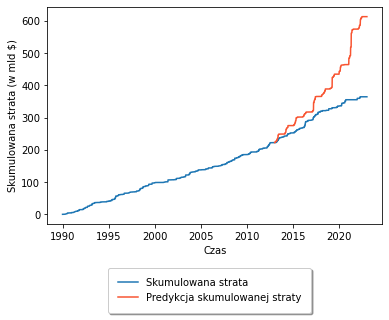

In [219]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_sin_ln["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_sin.pdf",bbox_inches='tight')
plt.show()

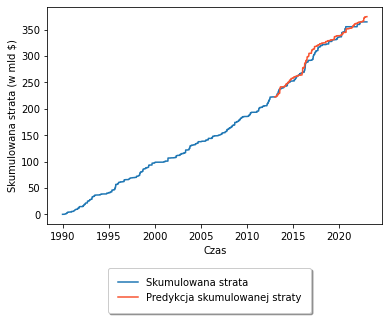

In [220]:
#Funkcja intensywności Power Law

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_power_law_ln["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_power_law.pdf",bbox_inches='tight')
plt.show()

In [ ]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Lognormalny','Lognormalny'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law'],
    'MSE':["{:e}".format(MSE(cum_loss_test["damages"],cum_loss_sin_ln["damages"])),"{:e}".format(MSE(cum_loss_test["damages"],cum_loss_power_law_ln["damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["damages"],cum_loss_sin_ln["damages"])),"{:e}".format(MAE(cum_loss_test["damages"],cum_loss_power_law_ln["damages"]))]                                            
}))

       rozkład                      funkcja           MSE           MAE
0  Wykładniczy  Sinusoidalna funkcja straty  4.538527e+14  1.795563e+07
1  Wykładniczy                    Power Law  1.126392e+15  3.011665e+07


Rozkład gamma

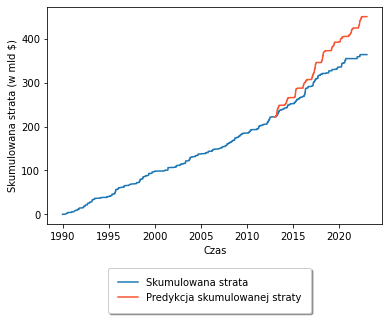

In [221]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_sin_gamma["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_gamma_sin.pdf",bbox_inches='tight')
plt.show()

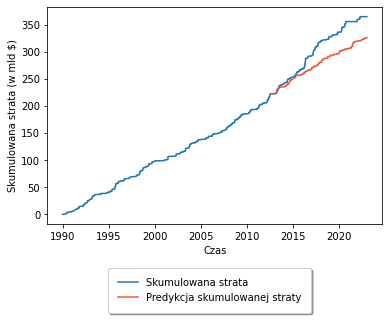

In [222]:
#Funkcja intensywności Power Law

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_power_law_gamma["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_gamma_power_law.pdf",bbox_inches='tight')
plt.show()

In [232]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Gamma','Gamma'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law'],
    'MSE':["{:e}".format(MSE(cum_loss_test["damages"],cum_loss_sin_gamma["damages"])),"{:e}".format(MSE(cum_loss_test["damages"],cum_loss_power_law_gamma["damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["damages"],cum_loss_sin_gamma["damages"])),"{:e}".format(MAE(cum_loss_test["damages"],cum_loss_power_law_gamma["damages"]))]                                            
}))

  rozkład                      funkcja           MSE           MAE
0   Gamma  Sinusoidalna funkcja straty  3.214450e+14  1.519815e+07
1   Gamma                    Power Law  8.438893e+14  2.603561e+07


Rozkład Weibulla

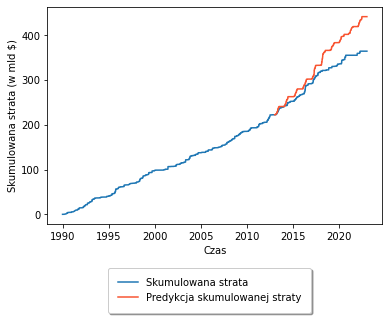

In [223]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_sin_weibull["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_weibull_sin.pdf",bbox_inches='tight')
plt.show()

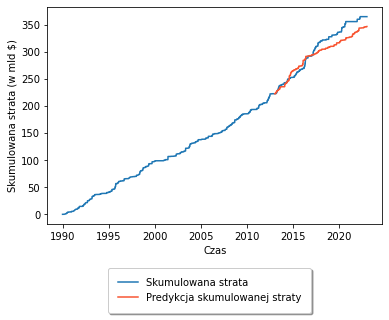

In [224]:
#Funkcja intensywności Power Law

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_power_law_weibull["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_weibull_power_law.pdf",bbox_inches='tight')
plt.show()

In [235]:
#Wyniki

print(pd.DataFrame
({
    'rozkład':['Weibull','Weibull'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law'],
    'MSE':["{:e}".format(MSE(cum_loss_test["damages"],cum_loss_sin_weibull["damages"])),"{:e}".format(MSE(cum_loss_test["damages"],cum_loss_power_law_weibull["damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["damages"],cum_loss_sin_weibull["damages"])),"{:e}".format(MAE(cum_loss_test["damages"],cum_loss_power_law_weibull["damages"]))]                                            
}))

   rozkład                      funkcja           MSE           MAE
0  Weibull  Sinusoidalna funkcja straty  7.332710e+13  7.422940e+06
1  Weibull                    Power Law  8.432360e+14  2.685229e+07


Rozkład Burra

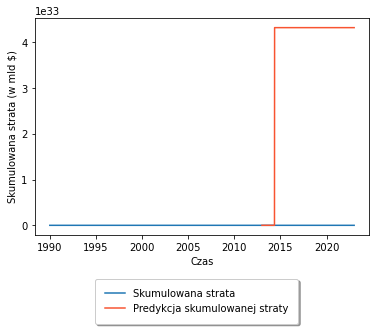

In [225]:
#Sinusoidalna funkcja intensywności

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_sin_burr["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_burr_sin.pdf",bbox_inches='tight')
plt.show()

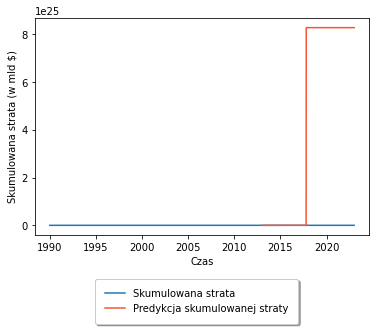

In [226]:
#Funkcja intensywności Power Law

plt.plot(cum_loss_full["damages"]/1e6, linestyle= '-')
plt.plot((cum_loss_power_law_burr["damages"]+float(cum_loss_train.tail(1)['damages']))/1e6, linestyle= '-',color="#f85431")

plt.xlabel("Czas")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))

#plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_burr_power_law.pdf",bbox_inches='tight')
plt.show()

In [201]:
# Wyniki

print(pd.DataFrame
({
    'rozkład':['Burr','Burr'],
    'funkcja':['Sinusoidalna funkcja straty','Power Law'],
    'MSE':["{:e}".format(MSE(cum_loss_test["damages"],cum_loss_sin_burr["damages"])),"{:e}".format(MSE(cum_loss_test["damages"],cum_loss_power_law_burr["damages"]))],
    'MAE':["{:e}".format(MAE(cum_loss_test["damages"],cum_loss_sin_burr["damages"])),"{:e}".format(MAE(cum_loss_test["damages"],cum_loss_power_law_burr["damages"]))]                                            
}))

ValueError: operands could not be broadcast together with shapes (12066,) (3652,) 

### Proces ryzyka

In [239]:
def risk_process(u, theta, mu, X, n, lambda_func, lambda_func_params, t_max):
    """
    Funkcja generuje niejednorodny proces Poissona metodą przerzerzedzania.

    Argumenty:
        u: float
            Kapitał początkowy
        theta: float
            Narzut
        mu: float
            Wartość oczekiwana X
        X: numpy.ndarray
            Wartości odszkodowań
        N: numpy.ndaray
            Liczba roszczeń
        lambda_func: funkcja
            Funkcja intensywności
        lambda_func_params: tab
            Tablica zawierająca parametry funkcji intensywności
        t_max: float
            Maksymalny czas symulacji
    Zwraca:
        numpy.ndarray
            Tablica procesu ryzyka
    """
    I = integrate.quad(lambda x: lambda_func(x,lambda_func_params)[0],0, t_max)[0]
    C=(1+theta)*mu*I
    loss = pd.DataFrame({"n":n, "Damages":X})
    cum_loss = loss.cumsum()

    R = u + C - cum_loss["Damages"]
    return R

In [240]:
def ruin_prob(u, theta, mu, lambda_func, lambda_func_params, loss_distribution, t_max, n):
    """
    Funkcja generuje niejednorodny proces Poissona metodą przerzerzedzania.

    Argumenty:
        u: float
            Kapitał początkowy
        theta: float
            Narzut
        mu: float
            Wartość oczekiwana X
        lambda_func: funkcja
            Funkcja intensywności
        loss_distribution: string
            Rozkład strat
        t_max: float
            Maksymalny czas symulacji
        n: int
            Liczba symulacji
    Zwraca:
        numpy.ndarray
            Tablica procesu ryzyka
    """
    negative = 0

    for i in range(n):
        if lambda_func == sin_int_fun:
            n_pred =np.unique(np.ceil(nhpp(sin_int_fun,result_sin.x,t_max)[1]), return_counts=True)[1]
        elif lambda_func == power_law_int_fun:
            n_pred =np.unique(np.ceil(nhpp(power_law_int_fun,result_power_law.x,t_max)[1]), return_counts=True)[1]
        elif lambda_func == musa_okumoto_int_fun:
            n_pred =np.unique(np.ceil(nhpp(musa_okumoto_int_fun,result_musa_okumoto.x,t_max)[1]), return_counts=True)[1]
        if loss_distribution == "expon":
            X = [np.sum(stats.expon.rvs(scale=1/lambda_hat,loc=0,size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "lognormal":
            X = [np.sum(stats.lognorm.rvs(s=np.sqrt(sigma_sq_hat),scale=np.exp(mu_hat),size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "gamma":
            X = [np.sum(stats.gamma.rvs(a=gamma_alfa,scale=1/gamma_beta,size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "weibull":
            X = [np.sum(stats.weibull_min.rvs(c=weibull_k,scale=weibull_lambda,size=np.sum(i))) for i in n_pred]
        elif loss_distribution == "burr":
            X = [np.sum(stats.burr12.rvs(c=burr_c,d=burr_k,size=np.sum(i))) for i in n_pred]
        R = risk_process(u, theta, mu, X, n_pred, lambda_func, lambda_func_params, t_max)
        if sum(R<0):
            negative += 1
    return(negative/n)

Sinusoidalna funkcja intensywności

In [241]:
rp_5_expon_sin = ruin_prob(1e7,0.3,1/lambda_hat,sin_int_fun,result_sin.x,"expon",5,10000)
rp_10_expon_sin = ruin_prob(1e7,0.3,1/lambda_hat,sin_int_fun,result_sin.x,"expon",10,10000)

In [243]:
rp_5_lognormal_sin = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),sin_int_fun,result_sin.x,"lognormal",5,10000)
rp_10_lognormal_sin = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),sin_int_fun,result_sin.x,"lognormal",10,10000)

In [244]:
rp_5_gamma_sin = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,sin_int_fun,result_sin.x,"gamma",5,10000)
rp_10_gamma_sin = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,sin_int_fun,result_sin.x,"gamma",10,10000)

In [245]:
rp_5_weibull_sin = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),sin_int_fun,result_sin.x,"weibull",5,10000)
rp_10_weibull_sin = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),sin_int_fun,result_sin.x,"weibull",10,10000)

In [246]:
rp_5_burr_sin = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),sin_int_fun,result_sin.x,"burr",5,10000)
rp_10_burr_sin = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),sin_int_fun,result_sin.x,"burr",10,10000)

Funkcja intensywności typu Power Law

In [247]:
rp_5_expon_power_law = ruin_prob(1e7,0.3,1/lambda_hat,power_law_int_fun,result_power_law.x,"expon",5,10000)
rp_10_expon_power_law = ruin_prob(1e7,0.3,1/lambda_hat,power_law_int_fun,result_power_law.x,"expon",10,10000)

In [248]:
rp_5_lognormal_power_law = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),power_law_int_fun,result_power_law.x,"lognormal",5,10000)
rp_10_lognormal_power_law = ruin_prob(1e7,0.3,np.exp(mu_hat+sigma_sq_hat/2),power_law_int_fun,result_power_law.x,"lognormal",10,10000)

In [249]:
rp_5_gamma_power_law = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,power_law_int_fun,result_power_law.x,"gamma",5,10000)
rp_10_gamma_power_law = ruin_prob(1e7,0.3,gamma_alfa/gamma_beta,power_law_int_fun,result_power_law.x,"gamma",10,10000)

In [250]:
rp_5_weibull_power_law = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),power_law_int_fun,result_power_law.x,"weibull",5,10000)
rp_10_weibull_power_law = ruin_prob(1e7,0.3,weibull_lambda*gamma(1+1/weibull_k),power_law_int_fun,result_power_law.x,"weibull",10,10000)

In [251]:
rp_5_burr_power_law = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),power_law_int_fun,result_power_law.x,"burr",5,10000)
rp_10_burr_power_law = ruin_prob(1e7,0.3,burr_k*beta(burr_k-1/burr_c,1+1/burr_c),power_law_int_fun,result_power_law.x,"burr",10,10000)

In [252]:
print(pd.DataFrame
({
    'rozkład':['Wykładniczy','Wykładniczy','Lognormalny','Lognormalny',"Gamma","Gamma","Weibulla","Weibulla","Burra","Burra"],
    'funkcja':['Sinusoidalna funkcja straty','Power Law','Sinusoidalna funkcja straty','Power Law','Sinusoidalna funkcja straty','Power Law','Sinusoidalna funkcja straty','Power Law','Sinusoidalna funkcja straty','Power Law'],
    '5 lat':[rp_5_expon_sin,rp_5_expon_power_law,rp_5_lognormal_sin,rp_5_lognormal_power_law,rp_5_gamma_sin,rp_5_gamma_power_law,rp_5_weibull_sin,rp_5_weibull_power_law,rp_5_burr_sin,rp_5_burr_power_law],
    '10 lat':[rp_10_expon_sin,rp_10_expon_power_law,rp_10_lognormal_sin,rp_10_lognormal_power_law,rp_10_gamma_sin,rp_10_gamma_power_law,rp_10_weibull_sin,rp_10_weibull_power_law,rp_10_burr_sin,rp_10_burr_power_law]
}))

       rozkład                      funkcja   5 lat  10 lat
0  Wykładniczy  Sinusoidalna funkcja straty  0.0036  0.0005
1  Wykładniczy                    Power Law  0.0023  0.0002
2  Lognormalny  Sinusoidalna funkcja straty  0.0969  0.0686
3  Lognormalny                    Power Law  0.0902  0.0716
4        Gamma  Sinusoidalna funkcja straty  0.0057  0.0018
5        Gamma                    Power Law  0.0058  0.0020
6     Weibulla  Sinusoidalna funkcja straty  0.0103  0.0026
7     Weibulla                    Power Law  0.0092  0.0032
8        Burra  Sinusoidalna funkcja straty  1.0000  1.0000
9        Burra                    Power Law  1.0000  1.0000


## Bootstrap

### Klasyczny bootstrap

In [673]:
def bootstrap(data,S , B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        X.append(S(pd.Series(data).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[S(X)-stats.t.ppf(1-2.5/100,len(X)-1)*std/np.sqrt(len(X)),S(X)-stats.t.ppf(2.5/100,len(X)-1)*std/np.sqrt(len(X))])
    return(S(X),std,[S(X)-stats.t.ppf(1-2.5/100,len(X)-1)*std/np.sqrt(len(X)),S(X)-stats.t.ppf(2.5/100,len(X)-1)*std/np.sqrt(len(X))])

In [701]:
def bootstrap(data,S ,alpha, B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
        alpha: float
            Poziom istotności
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        X.append(S(pd.Series(data).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[round(np.percentile(X,alpha/2),2),round(np.percentile(X,100-alpha/2),2)])
    return(S(X),std,[np.percentile(X,alpha/2),np.percentile(X,100-alpha/2)],X)

In [702]:
b = bootstrap(loss_train['Damages'],np.mean,5,100)

S:  9904558.46 std(S):  868637.57 CI:  [8320950.016304348, 11273473.130434781]


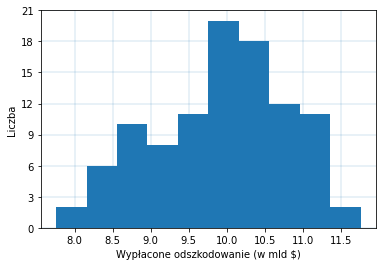

In [724]:
plt.hist(np.array(b[3])/1e6)
plt.xlabel("Wypłacone odszkodowanie (w mld $)")
plt.ylabel("Liczba")
plt.grid(color='C0', linestyle='-', linewidth=0.2)
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_xlim(left=0)
#ax.set_yticks(np.linspace(1,11,num=11))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\bootstrap_hist.pdf")
plt.show()

In [618]:
stats.bootstrap((loss_train['Damages'],),np.mean,confidence_level=0.95)

BootstrapResult(confidence_interval=ConfidenceInterval(low=8091255.947095301, high=11550465.057648512), standard_error=884141.2447429087)

In [698]:
bootstrap = pd.DataFrame({"n":pd.Series(test.groupby('Year').count()['Dis No']), "Mean":b[0], "LB": b[2][0], "UB": b[2][1]})
cum_bootstrap = bootstrap.cumsum()

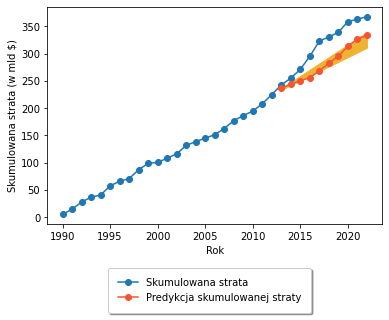

In [725]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_exp.index,(cum_bootstrap["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootstrap["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_sin_bootstrap.pdf",bbox_inches='tight')
plt.show()

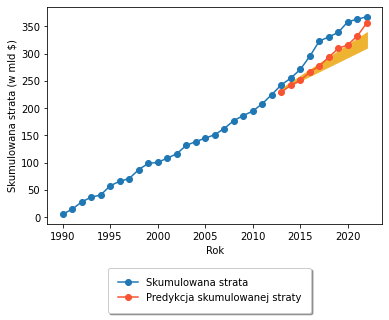

In [726]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_ln.index,(cum_bootstrap["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootstrap["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_sin_bootstrap.pdf",bbox_inches='tight')
plt.show()

### Bootknife

In [728]:
def bootknife(data,S ,alpha, B = 100):
    """
    Argumenty:
        data: pd.Series
            Ciąg start
        B: float
            Liczba próbek bootstrapowych
        S: fun
            Statystka
        alpha: float
            Poziom istotności
    Zwraca:
        
            
    """
    X= []
    for i in range(B):
        obs_to_delete = random.choice(pd.Series(data).index)
        data_r = data.drop(obs_to_delete)
        X.append(S(pd.Series(data_r).sample(len(data),replace=True)))
    std = np.sqrt(np.sum(np.square(X-np.mean(X)))/(B-1))
    print("S: ",round(S(X),2),"std(S): ", round(std,2), "CI: ",[round(np.percentile(X,alpha/2),2),round(np.percentile(X,100-alpha/2),2)])
    return(S(X),std,[np.percentile(X,alpha/2),np.percentile(X,100-alpha/2)],X)

In [732]:
b2 = bootknife(loss_train['Damages'],np.mean,5,100)

S:  9867131.01 std(S):  973764.36 CI:  [8148087.64, 11847820.25]


In [734]:
bootknife = pd.DataFrame({"n":pd.Series(test.groupby('Year').count()['Dis No']), "Mean":b[0], "LB": b[2][0], "UB": b[2][1]})
cum_bootknife = bootknife.cumsum()

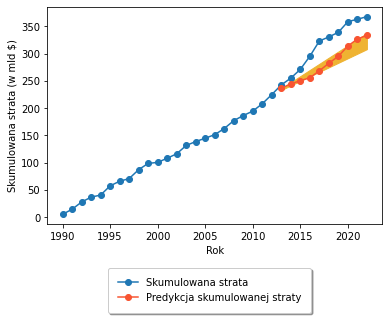

In [735]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_exp["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_exp.index,(cum_bootknife["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootknife["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_exp_sin_bootknife.pdf",bbox_inches='tight')
plt.show()

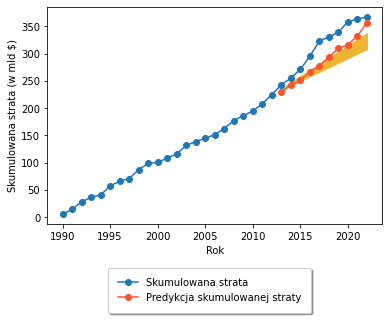

In [736]:
#Sinusoidalna funkcja intensywności
plt.plot(cum_loss_full["Damages"]/1e6, linestyle= '-',marker='o')
plt.plot((cum_loss_sin_ln["Damages"]+cum_loss_full["Damages"][2012])/1e6, linestyle= '-',marker='o',color="#f85431")
plt.fill_between(cum_loss_sin_ln.index,(cum_bootknife["LB"]+cum_loss_full["Damages"][2012])/1e6,(cum_bootknife["UB"]+cum_loss_full["Damages"][2012])/1e6,color="#efb332")
plt.xlabel("Rok")
plt.ylabel("Skumulowana strata (w mld $)")
plt.figlegend(['Skumulowana strata','Predykcja skumulowanej straty'],loc='lower center', fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5, -0.2))
plt.savefig("C:\\Users\\ndzad\\Dropbox\\MINI\\Magisterka\\repo\\mgr\\Rysunki\\cum_loss_ln_sin_bootknife.pdf",bbox_inches='tight')
plt.show()